In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [7]:
# Функция для заполнения пропусков
def fill_missing_values(series):
    for i in range(1, len(series) - 1):
        if series[i] == -1:
            series[i] = (series[i - 1] + series[i + 1]) / 2
    return series

# Применение функции к столбцу cum_power
solar_data['cum_power'] = fill_missing_values(solar_data['cum_power'])

# Проверить заполненные значения
print(solar_data['cum_power'])

# Рассчитать среднее арифметическое для столбца cum_power
mean_value = solar_data['cum_power'].mean()

# Округлить до целого
mean_value_rounded = round(mean_value)

print(f'Среднее арифметическое в столбце cum_power после заполнения пропусков: {mean_value_rounded}')

0      20111.0
1      20112.0
2      20115.0
3      20117.0
4      20119.0
        ...   
659    28101.0
660    28109.0
661    28115.0
662    28117.0
663    28120.0
Name: cum_power, Length: 664, dtype: float64
Среднее арифметическое в столбце cum_power после заполнения пропусков: 23848


In [8]:
# Преобразование столбца даты в формат datetime
solar_data['date'] = pd.to_datetime(solar_data['date'])

# Создание столбца day_power
# Предполагаем, что данные сортированы по дате, и можем вычислить разницу между текущей и предыдущей записью
data = solar_data.sort_values(by='date')
data['day_power'] = data['cum_power'].diff().fillna(0)

# Добавление столбца периода (год-месяц)
data['period'] = data['date'].dt.to_period('M')

# Группировка по периоду и расчет среднего значения для day_power
monthly_avg_power = data.groupby('period')['day_power'].mean()

# Получение среднего значения для марта 2017 года
march_2017_avg_power = monthly_avg_power['2017-03']

# Округление до целого числа
march_2017_avg_power_rounded = round(march_2017_avg_power)

print(f'Средняя дневная выработка солнечной энергии в марте 2017 года: {march_2017_avg_power_rounded}')

Средняя дневная выработка солнечной энергии в марте 2017 года: 11


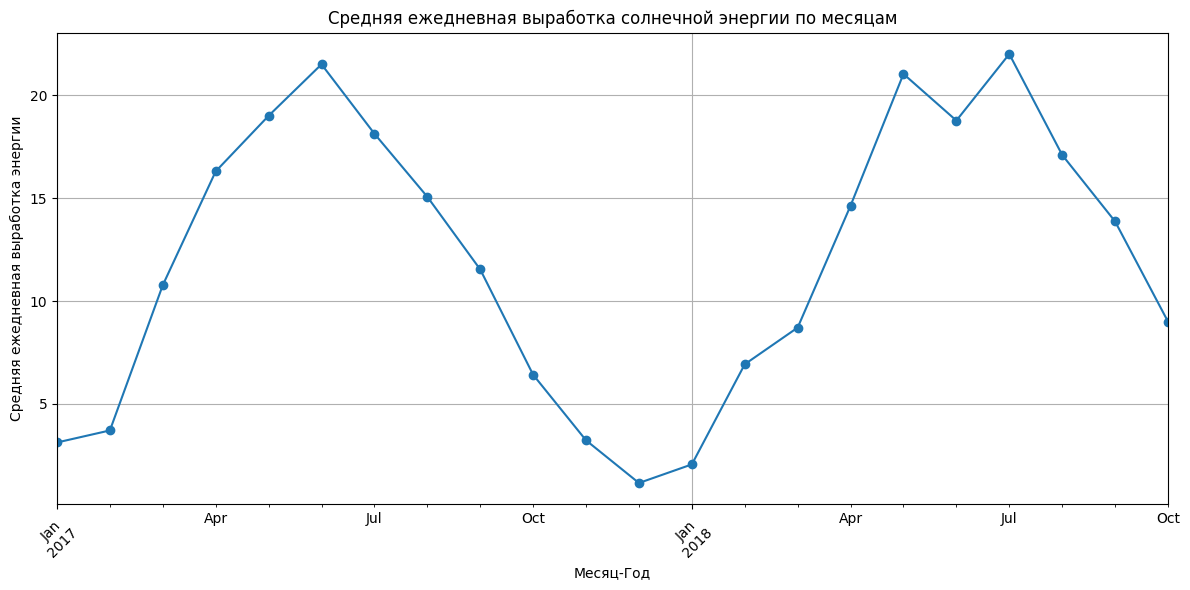

In [11]:
# Заполнение пропусков
data['cum_power'] = fill_missing_values(data['cum_power'])

# Преобразование столбца даты в формат datetime
data['date'] = pd.to_datetime(data['date'])

# Создание столбца ежедневной выработки энергии
data = data.sort_values(by='date')
data['day_power'] = data['cum_power'].diff().fillna(0)

# Добавление столбца периода (год-месяц)
data['period'] = data['date'].dt.to_period('M')

# Группировка по периоду и расчет среднего значения для day_power
monthly_avg_power = data.groupby('period')['day_power'].mean()

# Построение графика
plt.figure(figsize=(12, 6))
monthly_avg_power.plot(kind='line', marker='o')
plt.title('Средняя ежедневная выработка солнечной энергии по месяцам')
plt.xlabel('Месяц-Год')
plt.ylabel('Средняя ежедневная выработка энергии')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()